# TMM stability against changes in initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import jax

import jax.random as jrandom
import numpy as np
import matplotlib.pyplot as plt
import studenttmixture
import scipy
import tqdm
import sklearn.mixture
import pickle

# own code
import corc.datasets2d
# import corc.datasets_refactor as datasets2d
from corc.graph_metrics import tmm_gmm_neb
import corc.tmm_plots as tmm_plots
import corc.utils

# Testing Stability

In [3]:
datasets = corc.datasets2d.DATASETS
print(f"there are {len(datasets)} datasets")

dataset_name = 'Clusterlab7'
data_X, data_y = datasets[dataset_name]()
print(f'current dataset has {len(set(data_y.tolist()))} classes')

there are 18 datasets
current dataset has 5 classes


In [4]:
datasets.keys()

dict_keys(['Clusterlab2', 'Clusterlab3', 'Clusterlab4', 'Clusterlab5', 'Clusterlab6', 'Clusterlab7', 'Clusterlab8', 'Clusterlab9', 'Clusterlab10', 'Bowtie', 'ZigZag', 'ZigZig', 'Uniform Circle', 'Uniform Square', 'Aniso Blobs', 'Moons', 'Circles', 'Blobs'])

In [5]:
def train_multiple_tmm_models_seeds(data_X, data_y, num_seeds=10, neb_iterations=25):

    tmm_models = list()
    for i in range(num_seeds):
        tmm_model = corc.graph_metrics.neb.NEB(
            latent_dim=2,
            data=data_X,
            labels=data_y,
            optimization_iterations=neb_iterations,
            seed=42+i,
            n_init=5,
            n_components=15,
        )
        tmm_model.fit(data=data_X)
        tmm_models.append(tmm_model)

    return tmm_models


In [9]:
tmm_models = train_multiple_tmm_models_seeds(data_X, data_y, num_seeds=4, neb_iterations=25)

After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:16<00:00,  2.20it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:15<00:00,  2.30it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:15<00:00,  2.26it/s]


In [21]:
len(data_y)

250

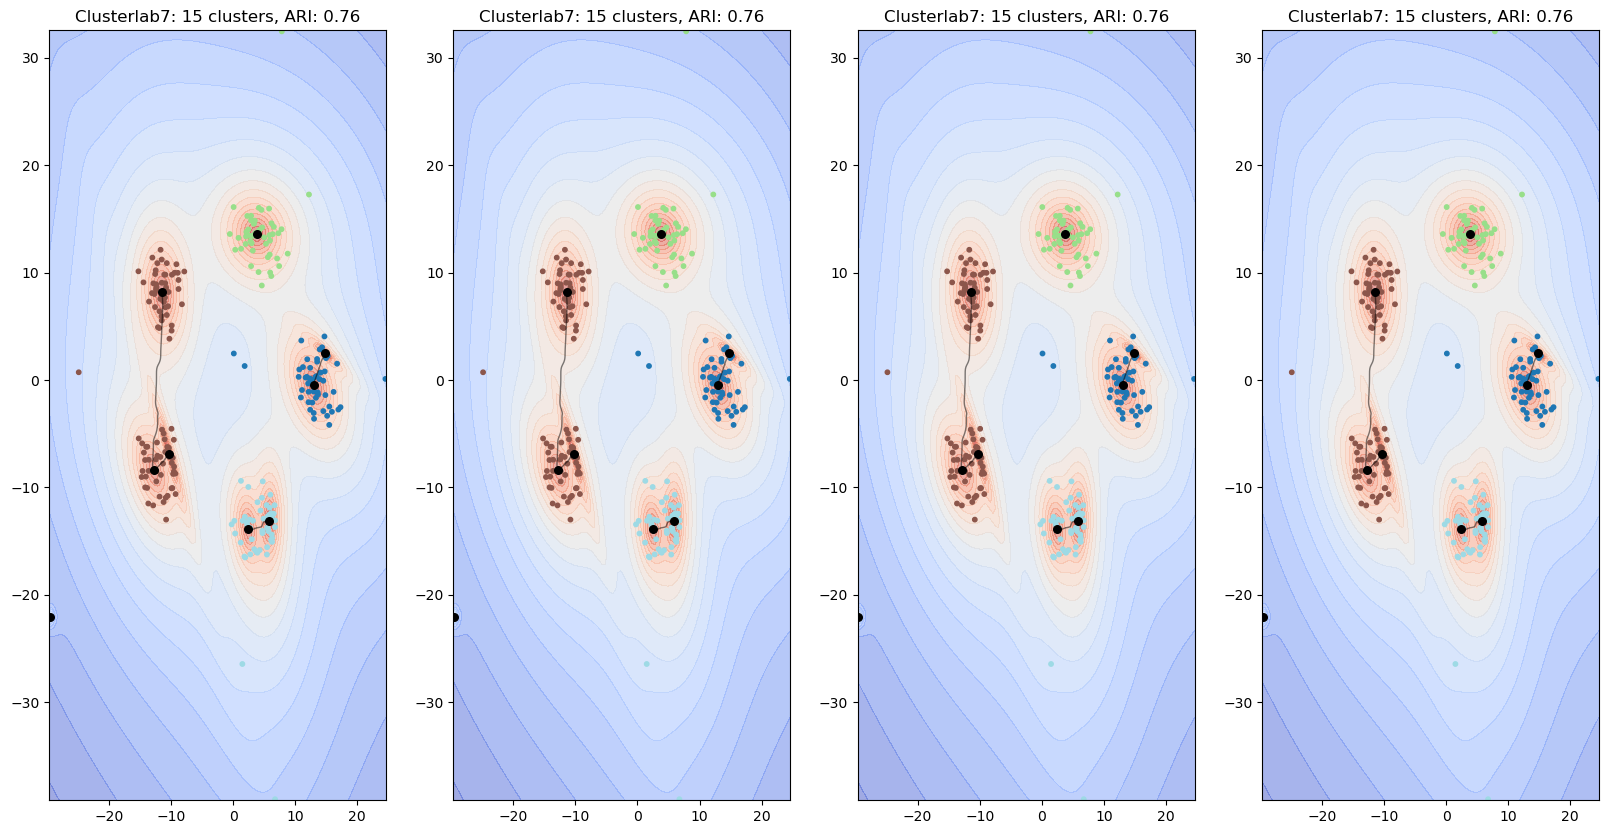

In [10]:
figure = tmm_plots.plot_tmm_models(tmm_models, data_X, data_y, dataset_name)
dataset_filename = dataset_name.replace(" ", "_")
figure.savefig(f"../../figures/stability_{dataset_filename}.pdf")
with open(f"../../cache/stability_seeds_{dataset_filename}.pkl", "wb") as f:
    pickle.dump(tmm_models, f)

# Playground wrt stability

Working on Clusterlab2 (0/18)
After filtering 15 components, we are left with 5 components


tmm: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


After filtering 15 components, we are left with 5 components


tmm: 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


After filtering 15 components, we are left with 5 components


tmm: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


After filtering 15 components, we are left with 5 components


tmm: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


After filtering 15 components, we are left with 5 components


tmm: 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]


Working on Clusterlab3 (1/18)
After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


After filtering 15 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.29it/s]


Working on Clusterlab4 (2/18)
After filtering 15 components, we are left with 10 components


tmm: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]


After filtering 15 components, we are left with 10 components


tmm: 100%|██████████| 45/45 [00:20<00:00,  2.24it/s]


After filtering 15 components, we are left with 10 components


tmm: 100%|██████████| 45/45 [00:19<00:00,  2.26it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]


After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:13<00:00,  2.15it/s]


After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]


After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:12<00:00,  2.32it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]


Working on Clusterlab5 (3/18)
After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]


After filtering 15 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]


Working on Clusterlab6 (4/18)
After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]


After filtering 15 components, we are left with 7 components


tmm: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]


After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:15<00:00,  2.32it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:15<00:00,  2.33it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:15<00:00,  2.29it/s]


After filtering 15 components, we are left with 12 components


tmm: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]


After filtering 15 components, we are left with 11 components


tmm: 100%|██████████| 55/55 [00:26<00:00,  2.06it/s]


After filtering 15 components, we are left with 11 components


tmm: 100%|██████████| 55/55 [00:25<00:00,  2.19it/s]


After filtering 15 components, we are left with 9 components


tmm: 100%|██████████| 36/36 [00:20<00:00,  1.72it/s]


Working on Clusterlab7 (5/18)
After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:13<00:00,  1.43it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:04<00:00,  1.63it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:01<00:00,  1.70it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:46<00:00,  1.98it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:56<00:00,  1.62it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:57<00:00,  1.58it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:10<00:00,  1.49it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:16<00:00,  1.38it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:01<00:00,  1.70it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:04<00:00,  1.62it/s]


Working on Clusterlab8 (6/18)
After filtering 15 components, we are left with 11 components


tmm: 100%|██████████| 55/55 [00:30<00:00,  1.80it/s]


After filtering 15 components, we are left with 10 components


tmm: 100%|██████████| 45/45 [00:22<00:00,  2.02it/s]


After filtering 15 components, we are left with 13 components


tmm: 100%|██████████| 78/78 [00:59<00:00,  1.31it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:53<00:00,  1.70it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:59<00:00,  1.52it/s]


After filtering 15 components, we are left with 14 components


tmm: 100%|██████████| 91/91 [00:58<00:00,  1.57it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:01<00:00,  1.71it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:07<00:00,  1.56it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:08<00:00,  1.53it/s]


After filtering 15 components, we are left with 15 components


tmm: 100%|██████████| 105/105 [01:11<00:00,  1.46it/s]


Working on Clusterlab9 (7/18)
After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]


After filtering 15 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:12<00:00,  2.25it/s]


After filtering 15 components, we are left with 8 components


tmm:  57%|█████▋    | 16/28 [00:07<00:05,  2.25it/s]


KeyboardInterrupt: 

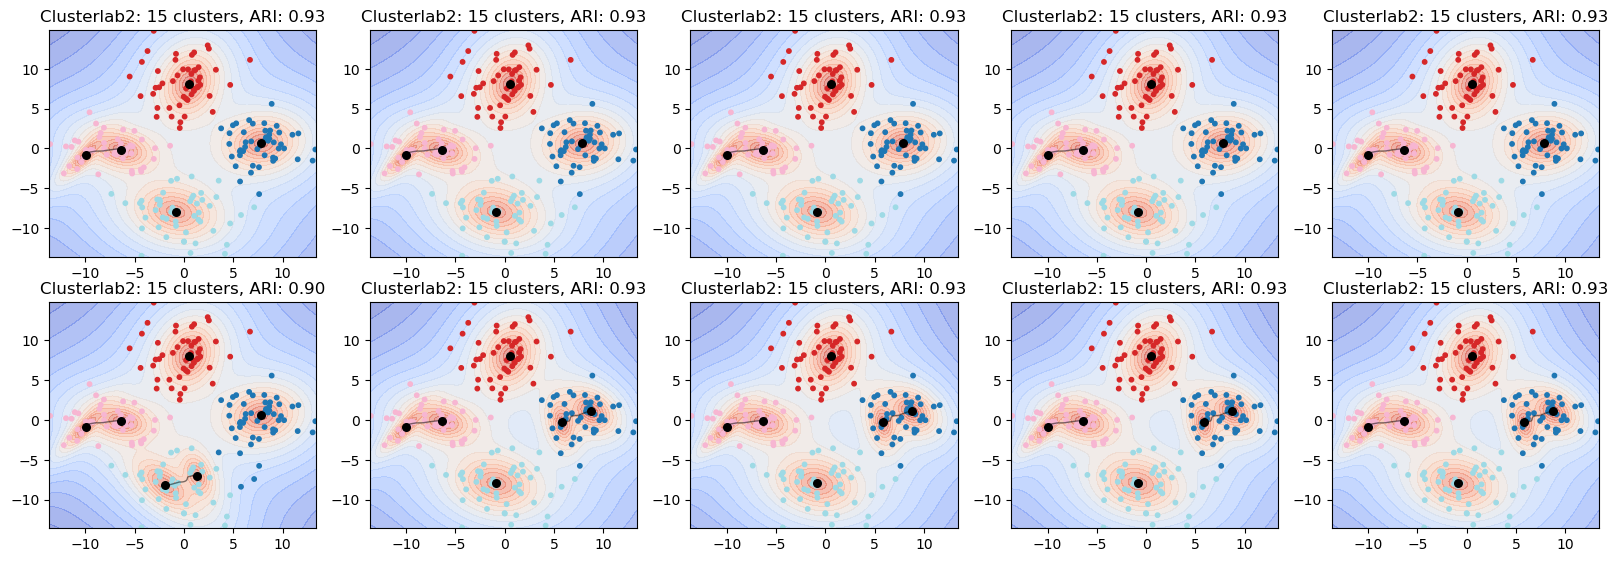

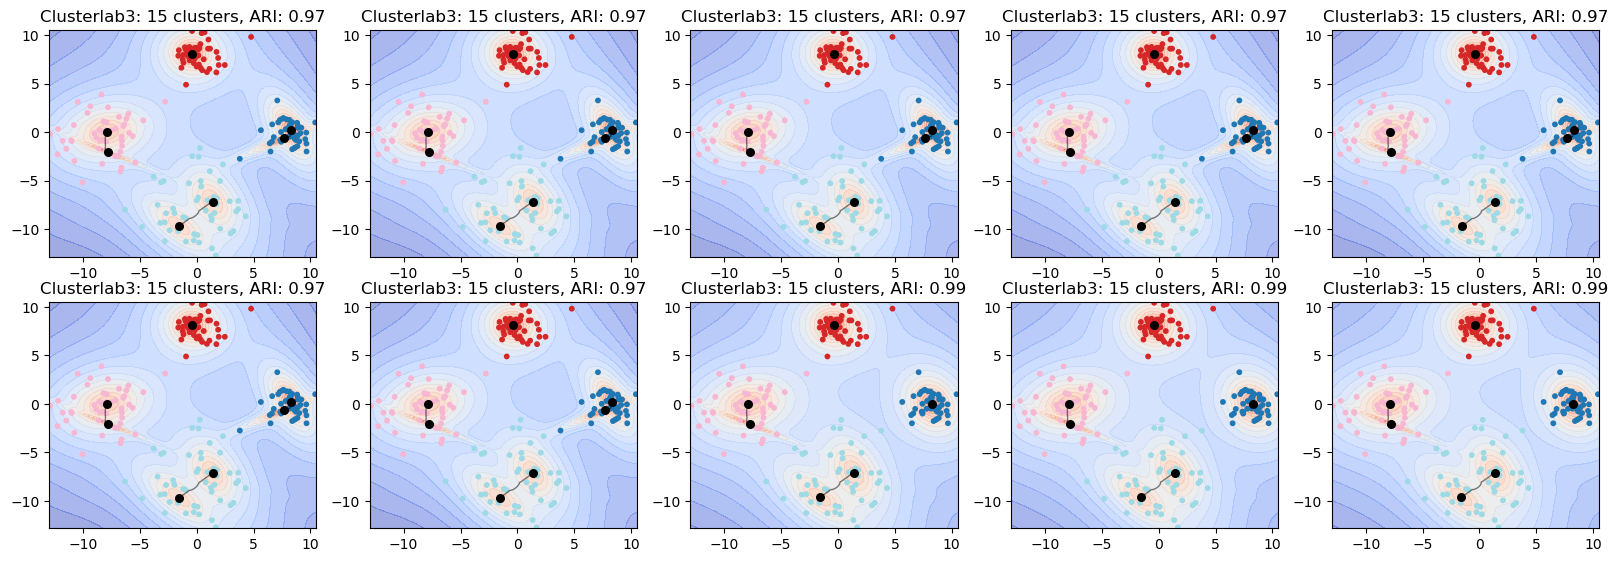

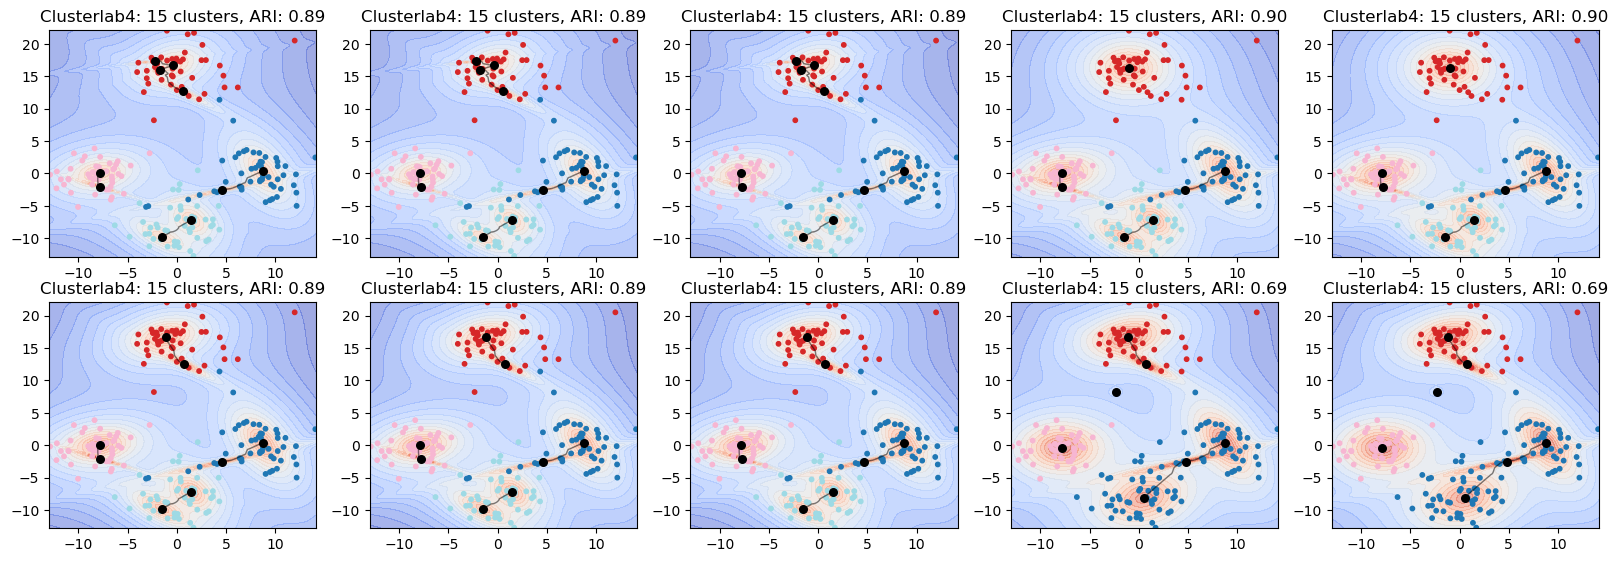

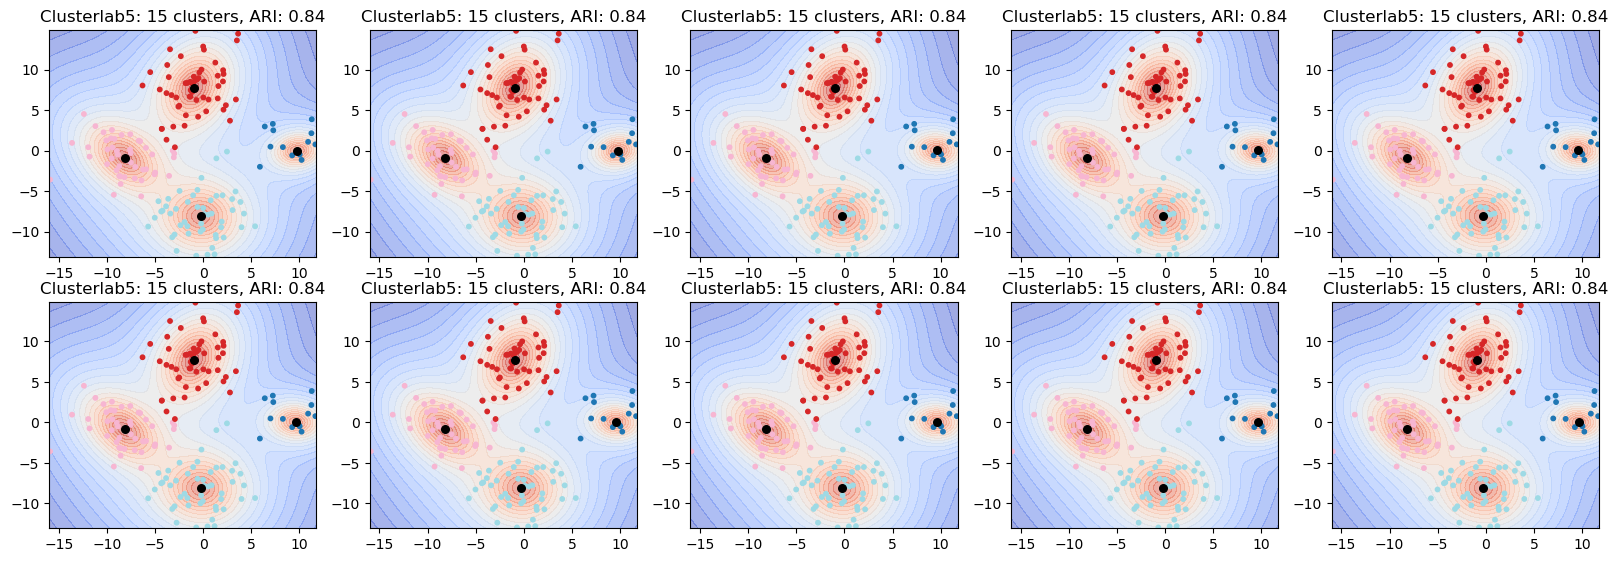

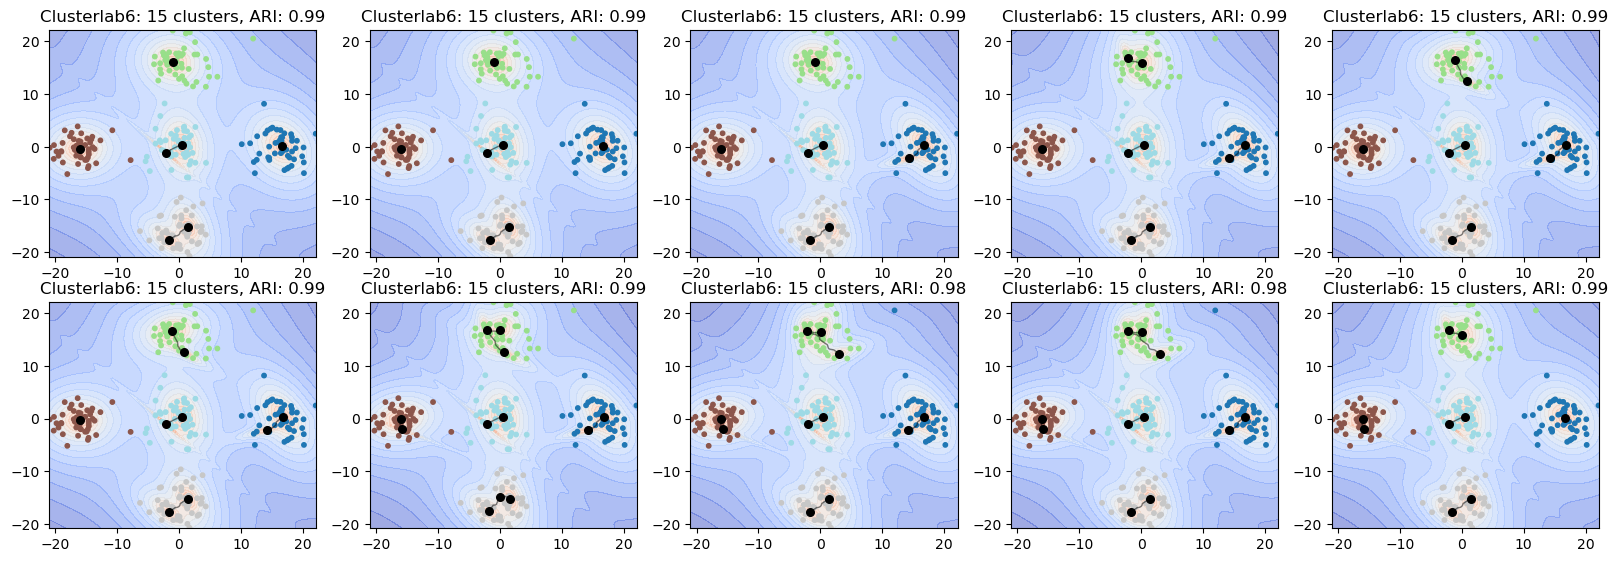

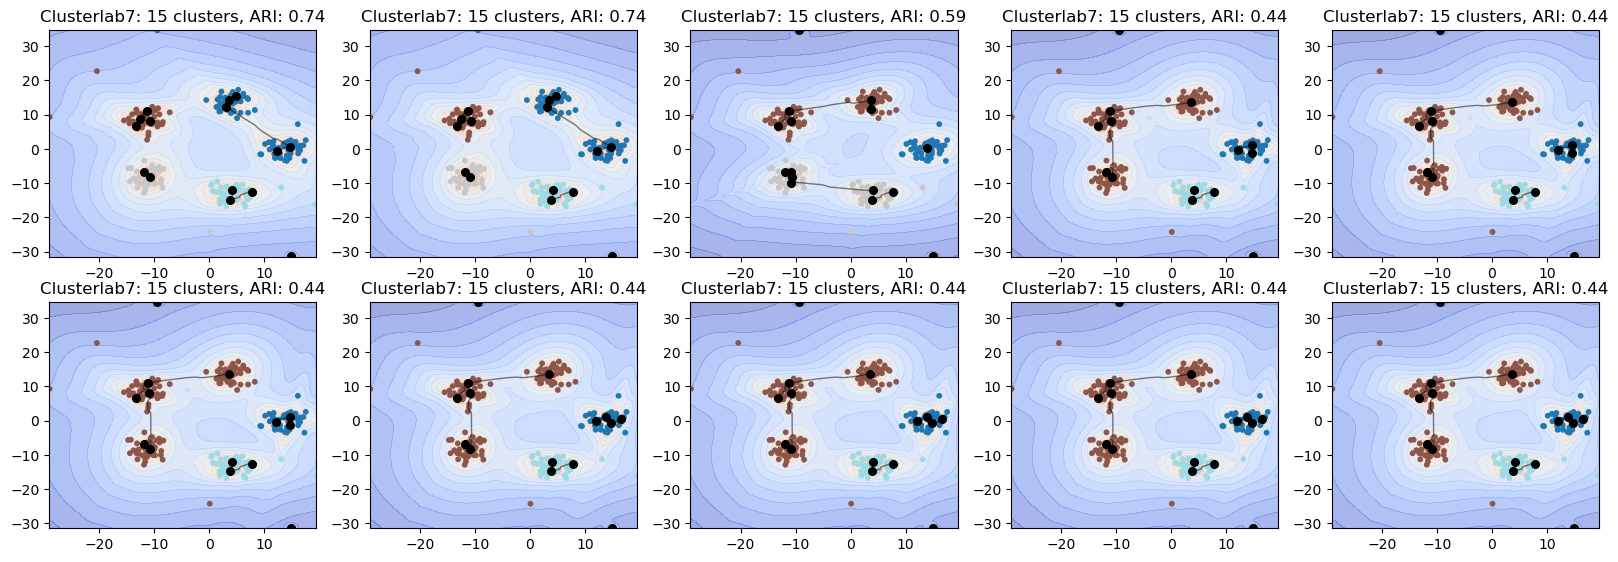

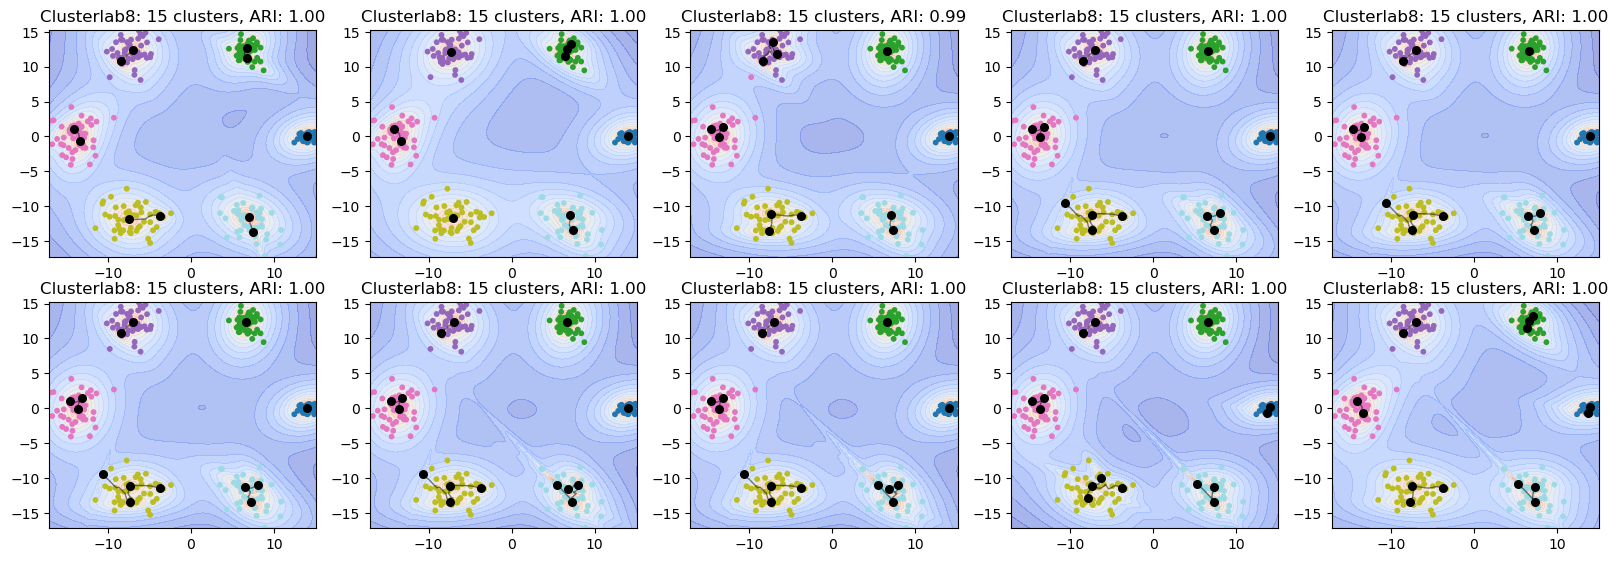

In [11]:
for i,dataset_name in enumerate(datasets.keys()):
    print(f"Working on {dataset_name} ({i}/{len(datasets)})")
    data_X, data_y = datasets[dataset_name]()
    tmm_models = train_multiple_tmm_models_seeds(data_X, data_y, num_seeds=10)
    figure = tmm_plots.plot_tmm_models(tmm_models, data_X, data_y, dataset_name)
    dataset_filename = dataset_name.replace(" ", "_")
    figure.savefig(f"../../figures/stability_{dataset_filename}.pdf")
    with open(f"../../cache/stability_seeds_{dataset_filename}.pkl", "wb") as f:
        pickle.dump(tmm_models, f)

In [7]:
import pickle 
pickle.load("cache/noisy_moons_TMM-NEB.pickle")

TypeError: file must have 'read' and 'readline' attributes

In [ ]:
tmm_model = corc.graph_metrics.neb.NEB(
    latent_dim=2,
    data=data_X,
    labels=data_y,
    optimization_iterations=100,
    seed=42+10
)
tmm_model.fit(data=data_X)
# tmm_models.append(tmm_model)

After filtering 15 components, we are left with 12 components


tmm: 100%|██████████| 66/66 [01:29<00:00,  1.35s/it]


In [ ]:
tmm_model = tmm_models[-2]

In [ ]:
pairs = tmm_model.get_merged_pairs(2)
len(pairs)

10

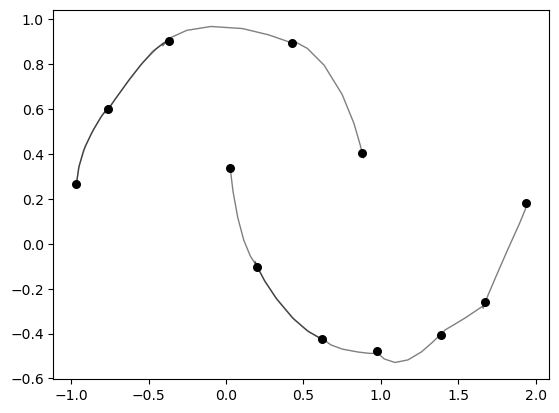

In [ ]:
tmm_model.plot_graph()